In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score


df = pd.read_csv('train.csv')

print(df.isnull().sum())

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [16]:
# Crear variable basada en rangos de precios. 0 - 150000 Económicas, 150000 a 300000 Intermedias y > 300000 Caras
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[0, 150000, 300000, float('inf')], labels=['Económica', 'Intermedia', 'Cara'])

X = df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df['PriceCategory'].value_counts()

PriceCategory
Intermedia    726
Económica     619
Cara          115
Name: count, dtype: int64

# Naive Bayes

In [18]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Confusion matrix for Naive Bayes\n', cm)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Confusion matrix for Naive Bayes
 [[ 22   0   2]
 [  0 129  10]
 [ 43  19  67]]
Accuracy:  0.7465753424657534
Precision:  0.7465753424657534
Recall:  0.7465753424657534
F1 Score:  0.7465753424657534


Matriz de Confusión:
[[ 16   0   8]
 [  0 134   5]
 [  3  15 111]]
Accuracy: 0.8938356164383562
Precision: 0.8927843978657478
Recall: 0.8938356164383562
F1 Score: 0.891785490506265
Classification Report:
              precision    recall  f1-score   support

        Cara       0.84      0.67      0.74        24
   Económica       0.90      0.96      0.93       139
  Intermedia       0.90      0.86      0.88       129

    accuracy                           0.89       292
   macro avg       0.88      0.83      0.85       292
weighted avg       0.89      0.89      0.89       292



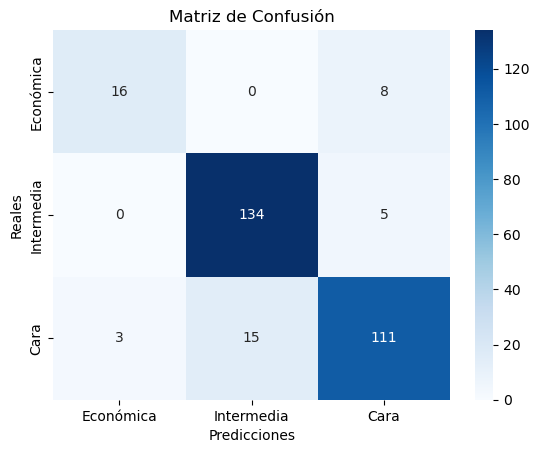

In [ ]:

df = pd.read_csv('train.csv')

df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[0, 150000, 300000, float('inf')], labels=['Económica', 'Intermedia', 'Cara'])

X = df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Económica', 'Intermedia', 'Cara'], yticklabels=['Económica', 'Intermedia', 'Cara'])
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión')
plt.show()

Resultados para Logistic Regression:
Accuracy: 0.8698630136986302
Precision: 0.8707389786935109
Recall: 0.8698630136986302
F1 Score: 0.8700907592030448
Matriz de Confusión:
[[ 18   0   6]
 [  0 128  11]
 [  8  13 108]]
Classification Report:
              precision    recall  f1-score   support

        Cara       0.69      0.75      0.72        24
   Económica       0.91      0.92      0.91       139
  Intermedia       0.86      0.84      0.85       129

    accuracy                           0.87       292
   macro avg       0.82      0.84      0.83       292
weighted avg       0.87      0.87      0.87       292



Resultados para Decision Tree:
Accuracy: 0.8116438356164384
Precision: 0.8140171506217726
Recall: 0.8116438356164384
F1 Score: 0.8126380823456116
Matriz de Confusión:
[[ 16   1   7]
 [  0 118  21]
 [ 10  16 103]]
Classification Report:
              precision    recall  f1-score   support

        Cara       0.62      0.67      0.64        24
   Económica       0.87      0

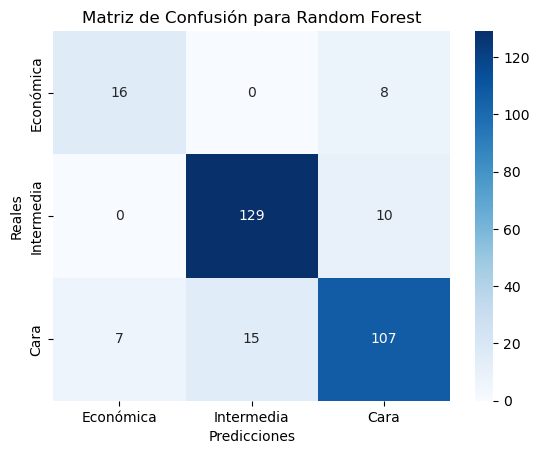

In [13]:
df = pd.read_csv('train.csv')

df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[0, 150000, 300000, float('inf')], labels=['Económica', 'Intermedia', 'Cara'])

X = df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)

    report = classification_report(y_test, y_pred)
    
    return accuracy, precision, recall, f1, cm, report

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1, cm, report = evaluate_model(model, X_test, y_test)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report
    }
    
    print(f"Resultados para {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Matriz de Confusión:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("\n" + "="*50 + "\n")

for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {metrics['Accuracy']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1 Score: {metrics['F1 Score']}")
    print("\n")

best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model_cm = results[best_model_name]['Confusion Matrix']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Económica', 'Intermedia', 'Cara'], yticklabels=['Económica', 'Intermedia', 'Cara'])
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title(f'Matriz de Confusión para {best_model_name}')
plt.show()